## Saikiran N. Pasikanti
### Time series

Data Source: https://www.transtats.bts.gov/TRAFFIC/<br>

Selections:
Date: Oct 2002 to Oct 2017
Geographic Area: System (domestic and international)
Schedule Type: Total
Operating Statistics: Revenue Passenger Miles

(Revenue passenger miles are calculated by multiplying the number of paying passengers by the distance traveled. For example, an airplane with 100 passengers that flies 250 miles has generated 25,000 RPMs.)

Problem Statement:
1. How the data changes from month to month, year to year?
Any trend?
How fluctuated the curve is?
Any seasonal effects?
Any unusual years/months which have significantly small or large number?
2. Forecast future value based on the time series?

In [4]:
## Air Traffic Control Chart 
setwd("C:\\Users\\saikiran\\Documents\\GitHub\\Advanced Statistics Using R\\010_Time Series") 
temp <- read.csv("USCarrier_Traffic_20180128011624.csv", skip=3) 

head(temp) 

Period,Total
October 2002,54019748
November 2002,50105232
December 2002,56656594
January 2003,51197175
February 2003,47040806
March 2003,56765848


In [5]:
dataset <- as.data.frame(temp[-182,], names=T) 
class(dataset$Total) 

[1] "factor"

In [6]:
dataset$Total <- as.numeric(as.character(dataset$Total)) 
head(dataset$Total) 

[1] 54019748 50105232 56656594 51197175 47040806 56765848

In [7]:
str(dataset) 

'data.frame':	181 obs. of  2 variables:
 $ Period: Factor w/ 182 levels "April 2003","April 2004",..: 151 136 31 61 46 106 1 121 91 76 ...
 $ Total : num  54019748 50105232 56656594 51197175 47040806 ...


In [8]:
### Data for Time Series #### 
airtraf <- dataset[,-1] 
head(airtraf) 
## time series object ## With reference to "dataset" observations are from October 2002 to October 2017 

[1] 54019748 50105232 56656594 51197175 47040806 56765848

In [9]:
## All the 12 months data has been provided 
AT <- ts(airtraf, start=c(2002,10), end =c(2017,10), frequency = 12 ) 
print(AT) 

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2002                                                                        
2003 51197175 47040806 56765848 51857179 54335598 60272900 65962215 64989766
2004 53979780 53179685 64035863 62340117 62530704 68866389 73335888 70961513
2005 59629608 55795165 70595861 65145550 68268899 72952958 77432998 73778917
2006 61035027 56729212 70799794 68120558 69352605 74085927 77798585 74227040
2007 63016013 57793832 72700241 69836156 71933109 76926452 80988340 79439827
2008 64667106 61504426 74575531 68906881 72725749 76162104 79707545 77300567
2009 58373783 53506580 66027341 65166298 65868253 71350226 77136797 74614770
2010 59651061 53240065 68307089 64953249 68850904 74474550 79304441 76741308
2011 61630362 55391206 70158268 67683558 71711447 76057910 81423230 77247893
2012 61940192 58243794 71696202 68668302 71887531 76760758 80499331 78609006
2013 63139218 58109870 72764478 68453537 73574534 78467131 81974582 80007788

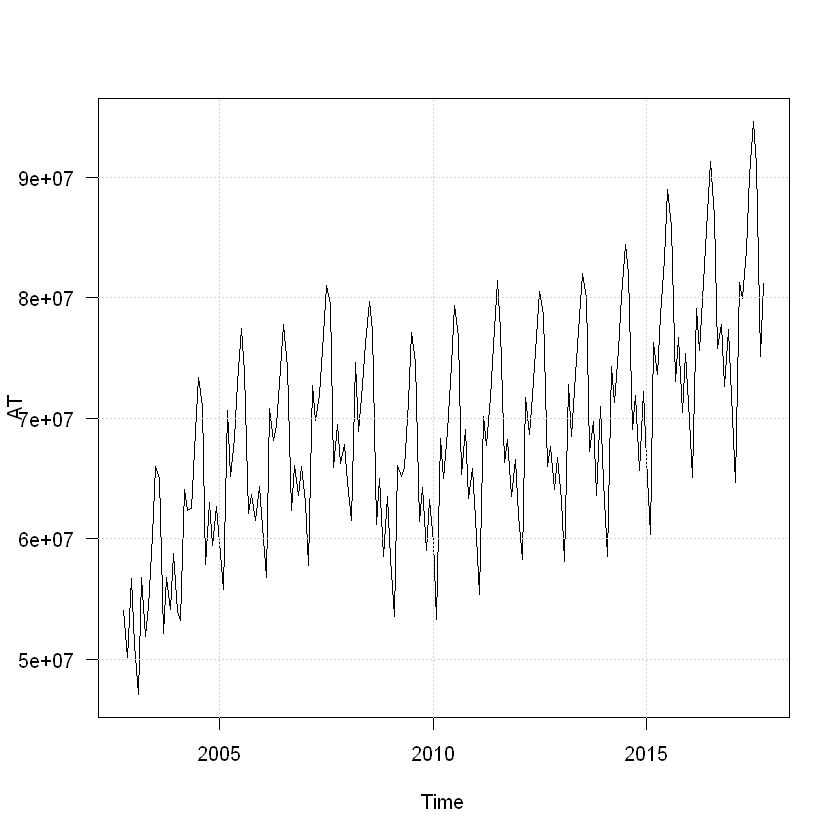

In [10]:
plot(AT,las=1) 
grid()

The plot clear shows that it is non-stationary series.
We can see from the time plot that this time series could probably be described using an additive model, since the random fluctuations in the data are roughly constant in size over time.

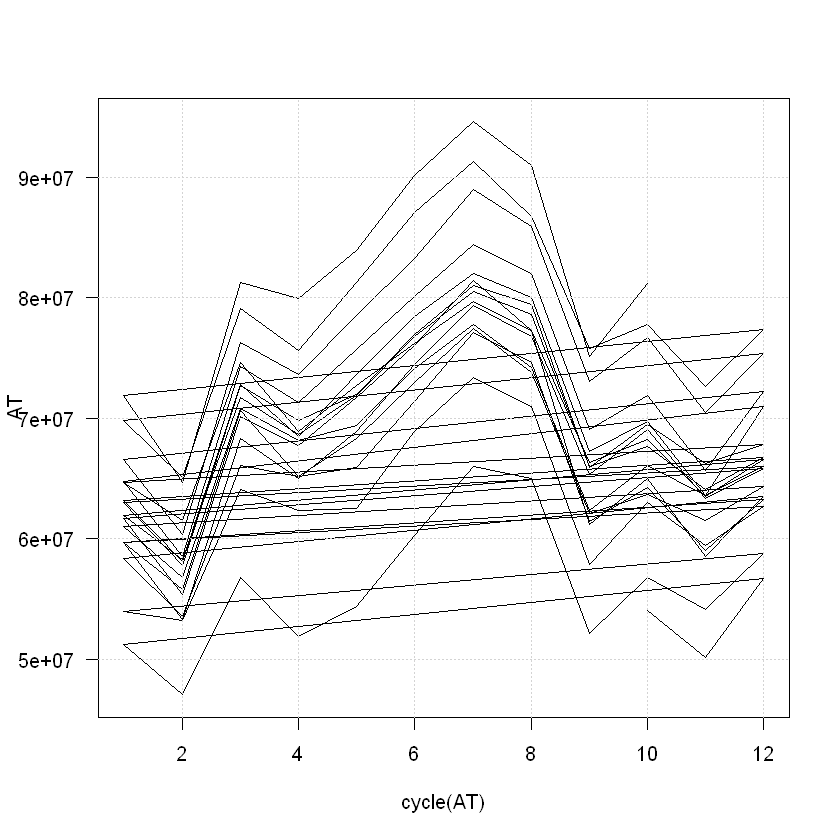

In [11]:
plot(cycle(AT),AT, type="l", las=1) 
grid()

From April to July – total revenue passenger miles increasing linearly.
From December to February – total revenue passenger miles decreasing linearly.
February and September – has sudden down points.
While March and July – peak revenue passenger miles.
From Year to Year – the revenue shows a secular upward trend

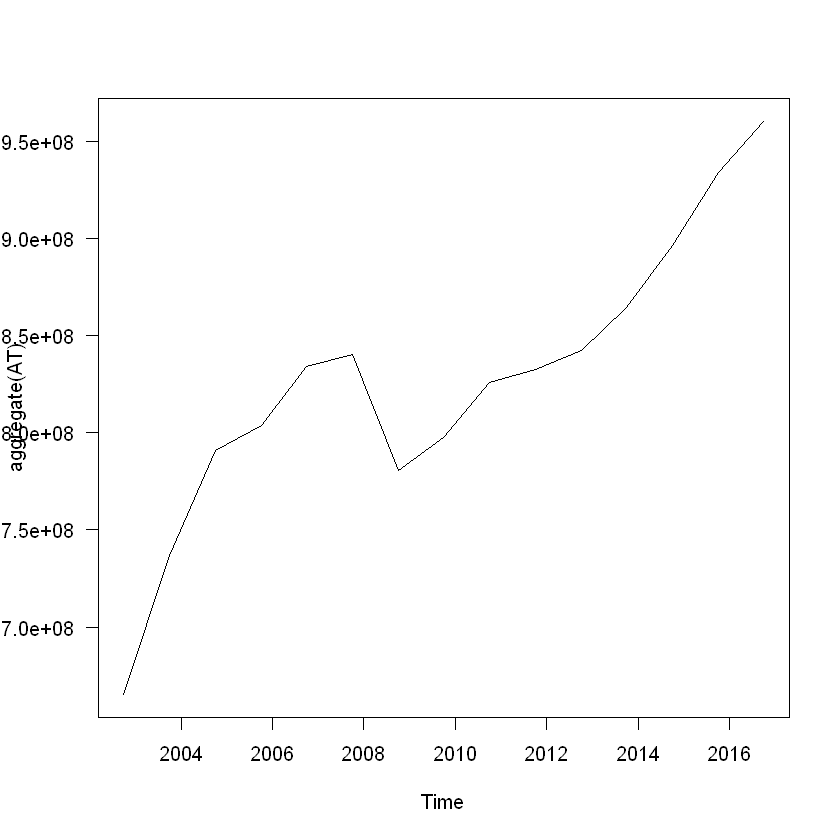

In [12]:
plot(aggregate(AT), las=1)

[1] 51197175 56765848 51857179 79917608 54335598 83921422 60272900 90112473
 [9] 65962215 94623610 90963785 52121480 81141740 50105232

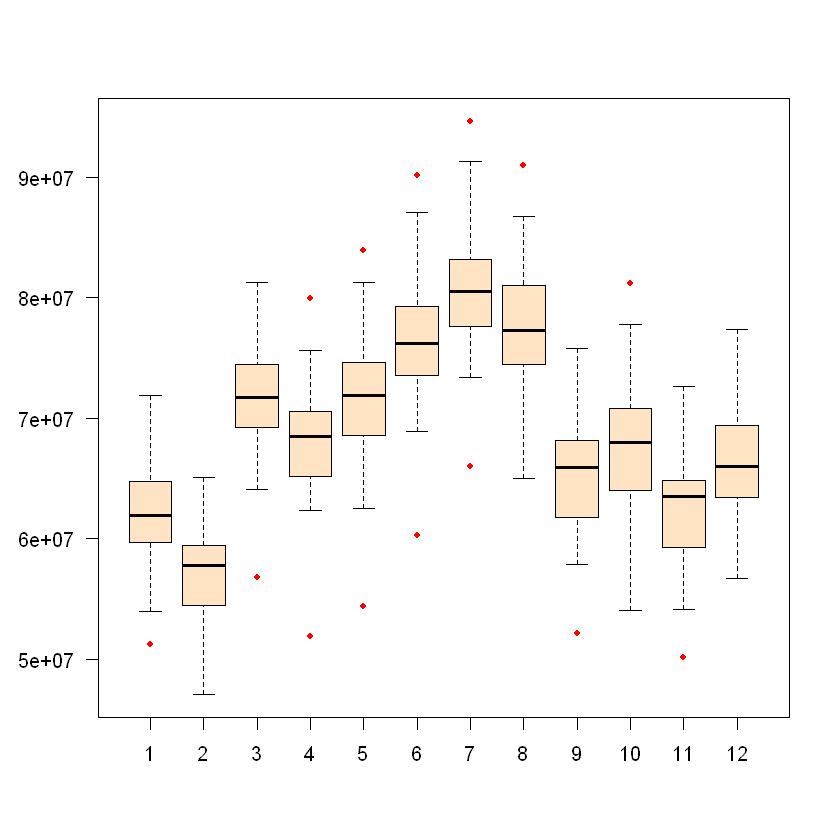

In [13]:
a <- boxplot(AT~cycle(AT),las=1, col="bisque", outcol="red", pch=20) 
a$out

Any unusual years/months which have significantly small or large number?
As seen in the above seasonal boxplot, the list of unsual data are as follows:

So, for above month-years, the total revenue passenger miles records have unsual data points.

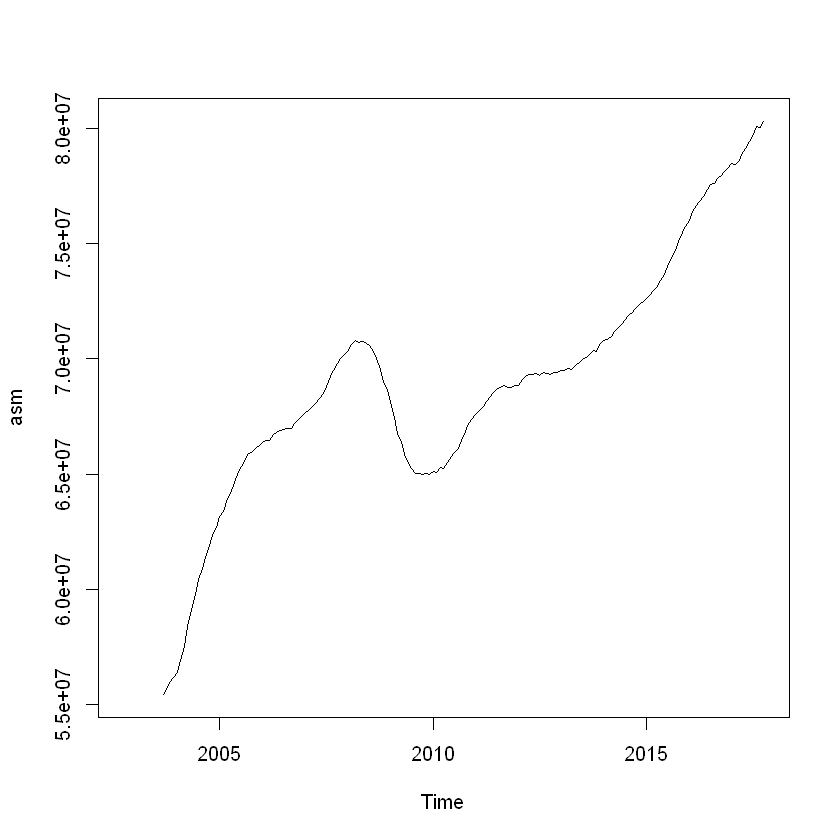

In [14]:
### Smoothed Wavform ##### 
library(TTR) 
asm <- SMA(AT,n=12) 
plot.ts(asm)

In [16]:
### Decomposing ##### 
ATD <- decompose(AT) 
## type = additive by default, you can use multiplicative also 

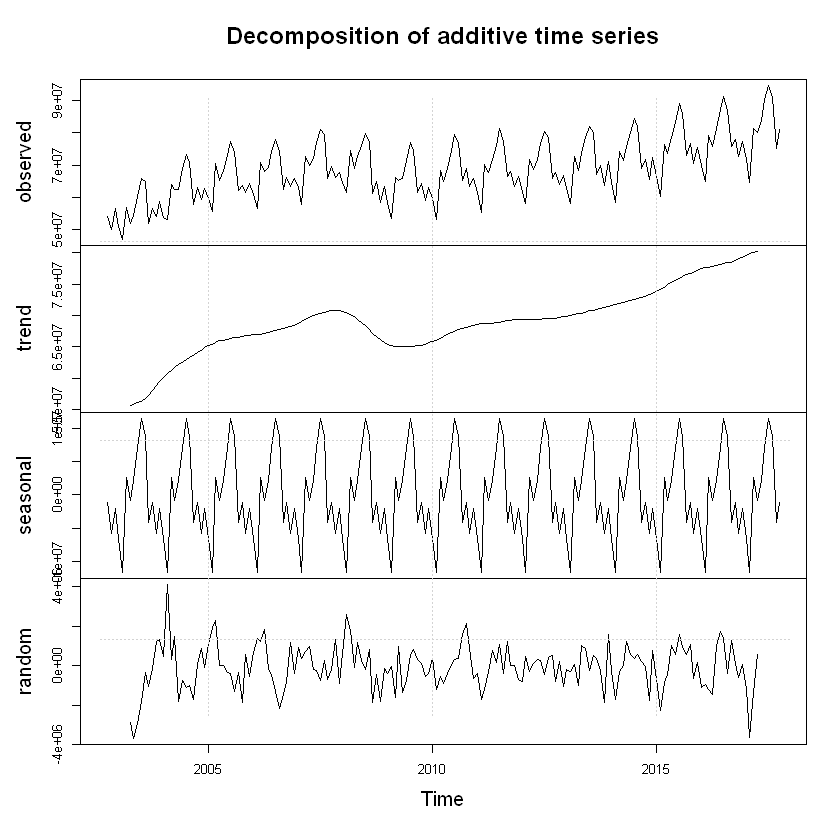

In [17]:
plot(ATD) 
grid()

Any trend?
Yes, there is a upward trend.
Any seasonal effects?
Yes, there is a seasonal effect observed in the given data
and the seasonal components are:

In [18]:
ATD$seasonal

           Jan       Feb       Mar       Apr       May       Jun       Jul
2002                                                                      
2003  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2004  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2005  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2006  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2007  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2008  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2009  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2010  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2011  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2012  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2013  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2014  -6579747 -11600322 

In [19]:
ATD$figure

[1]  -1112045  -5824802  -2037202  -6579747 -11600322   2582094   -822307
 [8]   2196799   7086505  11495015   8685639  -4069626

In [20]:
ATD$type 

[1] "additive"

In [21]:
ATD$random

              Jan          Feb          Mar          Apr          May
2002                                                                 
2003           NA           NA           NA -2876921.325 -3697951.730
2004   452368.702  4116789.862   301747.830  1508059.592 -1804703.105
2005  1061821.493  1959849.071  2287163.705    41855.967    34231.478
2006   696953.285  1377809.029  1234847.663  1845837.467  -127513.688
2007   947117.952   395406.362   753551.371  1005085.550  -169771.355
2008   603421.702  2603819.321  1778083.746  -105261.616  1201373.145
2009  -400487.673   -28092.638 -1587697.920   976778.967 -1330160.813
2010   375383.993 -1193960.929  -560706.129  -872763.158  -374221.022
2011  -396811.298 -1724782.554 -1203078.504  -277982.616   761429.228
2012  -814871.965   491088.112  -281568.004   129835.675   328035.437
2013  -179572.715  -308096.763    56008.580  -985736.075  1048588.437
2014  -278001.215 -1708641.638  -286095.962    -6269.783  1233477.687
2015  -710502.923 -2

How fluctuated the curve is?
For each year, the total revenue passenger miles is widely fluctuating between February and July (approximately by 2000000 for each year).
Submitted by : Saikiran N. Pasikanti

Random fluctuations in the data are roughly constant in size over time.
Seasonal fluctuations are roughly constant in size over time and do not seem to depend on the level of the time series.

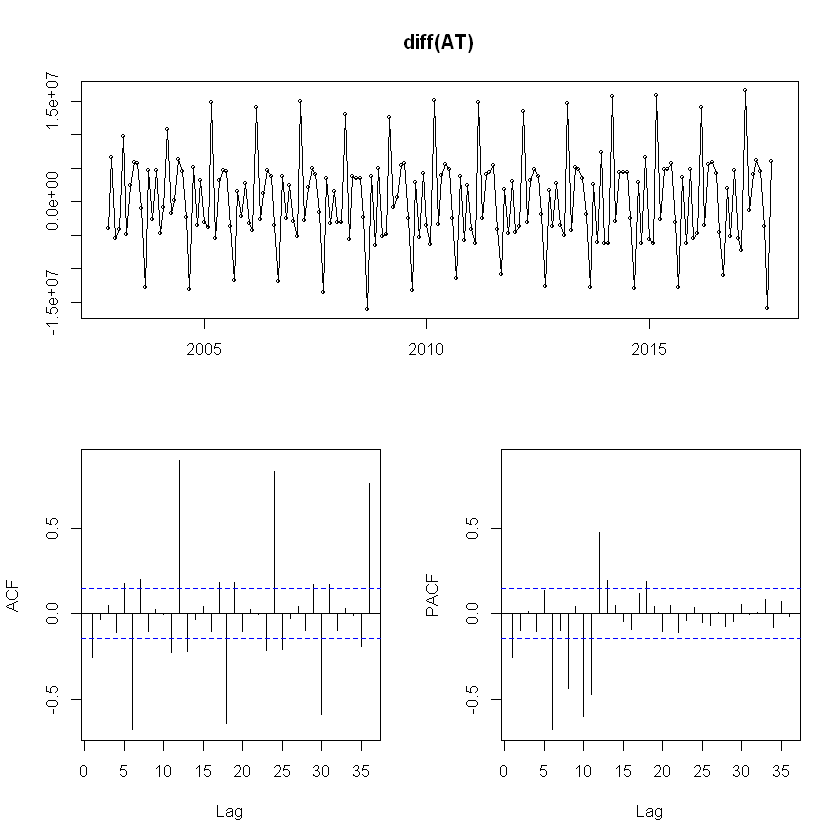

In [23]:
#### FORECASTING ####
#install.packages("forecast")
library(forecast) 
tsdisplay(diff(AT)) 

In [25]:
#### Using ARIMA Model #### 
ATF1 <- arima(AT, order = c(p=2,d=1,q=1)) 
ATF1 


Call:
arima(x = AT, order = c(p = 2, d = 1, q = 1))

Coefficients:
          ar1      ar2     ma1
      -1.1037  -0.3941  0.9814
s.e.   0.0692   0.0688  0.0210

sigma^2 estimated as 3.529e+13:  log likelihood = -3064.01,  aic = 6136.02

In [26]:
forecast(ATF1, h=12)

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Nov 2017       81094927 73482107  88707747 69452124  92737731
Dec 2017       78755840 68626869  88884811 63264915  94246764
Jan 2018       81355955 70185876  92526033 64272794  98439116
Feb 2018       79408091 66089783  92726399 59039496  99776686
Mar 2018       80533183 66227511  94838854 58654546 102411819
Apr 2018       80059119 64362113  95756125 56052621 104065618
May 2018       80138916 63371693  96906140 54495661 105782172
Jun 2018       80237685 62418592  98056778 52985734 107489636
Jul 2018       80097223 61261826  98932621 51290969 108903478
Aug 2018       80213325 60454428  99972221 49994701 110431949
Sep 2018       80140543 59464724 100816362 48519606 111761480
Oct 2018       80175114 58643431 101706796 47245247 113104980

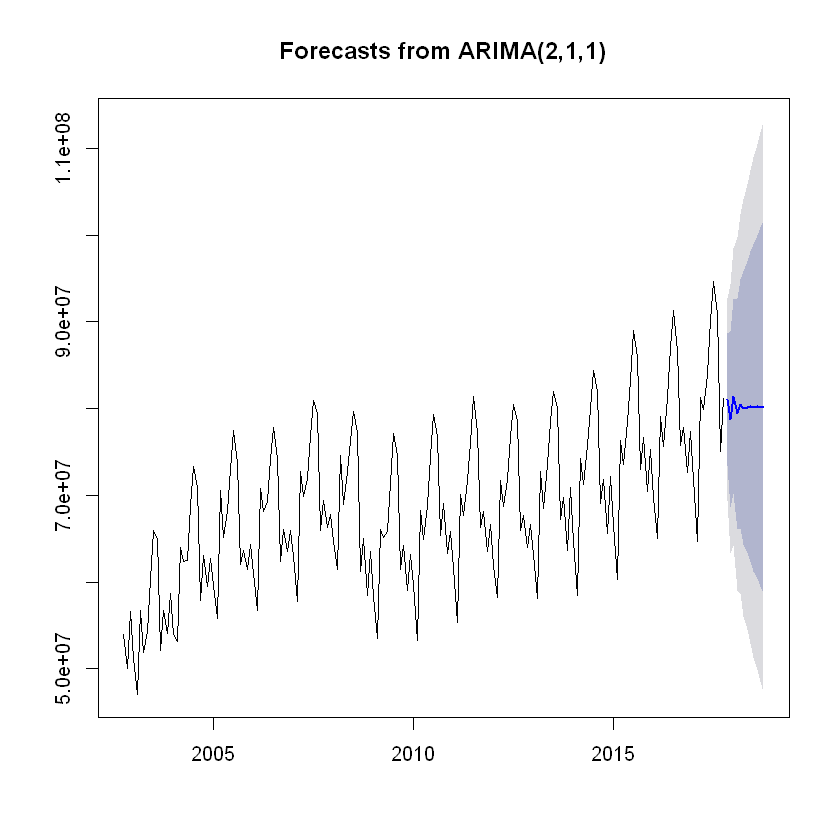

In [27]:
plot(forecast(ATF1, h=12))

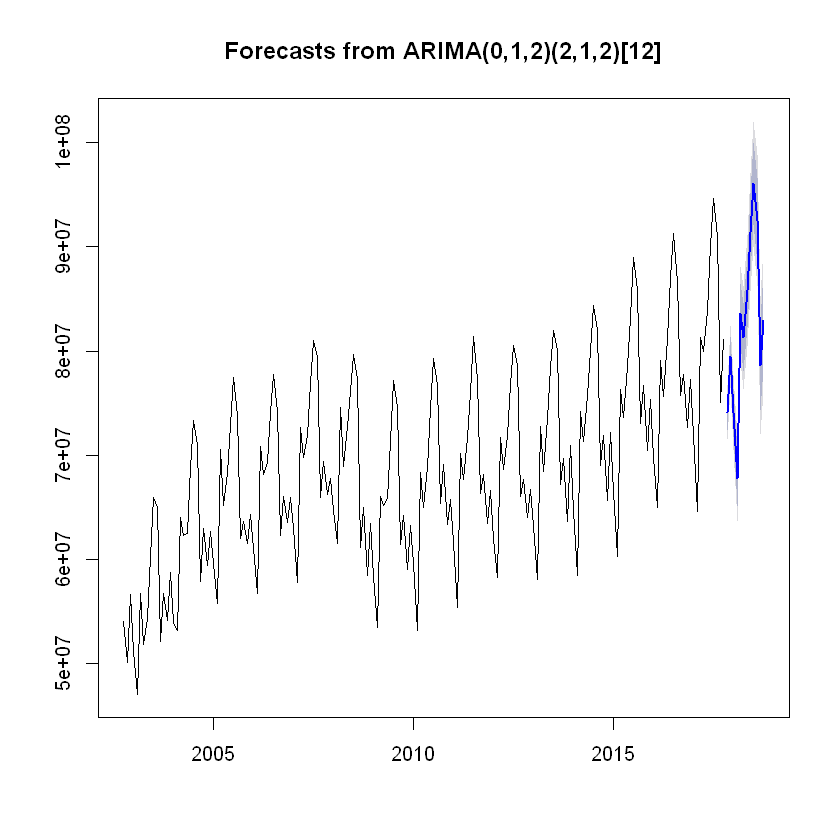

In [28]:
#### Using AUTO ARIMA Model #### 
ATF2 <- auto.arima(AT) 
plot(forecast(auto.arima(AT), h=12)) 

In [29]:
ATF2$fitted

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2002                                                                        
2003 51192536 47040865 56756952 51854130 54330604 60262847 65947758 64977555
2004 54061218 50036017 61694917 59111602 63614533 69578803 74507566 72557228
2005 58635567 56666983 67015886 65893204 67282220 73819974 78404024 75733569
2006 60726363 57327182 69629768 65624094 69655945 75302913 79365359 75595537
2007 62776792 59324661 71496803 68782792 71037685 76978752 81330102 78082674
2008 65052121 60061890 74908431 71434288 72055822 77005317 80915987 77743209
2009 59002068 55289871 67524556 62069669 66220626 70898387 74925465 73730189
2010 58830513 54802625 67306472 65061765 66886561 73014422 79107402 77124599
2011 62687090 56654291 69763107 66321918 70227305 76380663 81042047 78651319
2012 62454710 56504753 71605786 69492451 72090291 76642217 81851133 77822147
2013 62652463 58248962 72197779 69386816 72299482 77756687 82700406 79943749